In [ ]:
#Aim : Denoising of images using autoencoder

In [ ]:
import keras
from keras.datasets import mnist
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(xtrain,_),(xtest,_) = mnist.load_data()

In [ ]:
xtrain = xtrain.astype("float32")/255

In [ ]:
xtest = xtest.astype('float32')/255

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
xtrain = np.reshape(xtrain,(len(xtrain),28,28,1))

In [ ]:
xtest = np.reshape(xtest,(len(xtest),28,28,1))

In [ ]:
xtrain.shape

(60000, 28, 28, 1)

In [ ]:
xtest.shape

(10000, 28, 28, 1)

In [ ]:
#Generating noisy images
noise_factor = 0.5
xtrain_noisy = xtrain+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=xtrain.shape)#loc-mean #scale-standard deviation
xtest_noisy = xtest+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=xtest.shape)

In [ ]:
xtrain_noisy = np.clip(xtrain_noisy,0.,1.)

In [ ]:
xtest_noisy = np.clip(xtest_noisy,0.,1.)

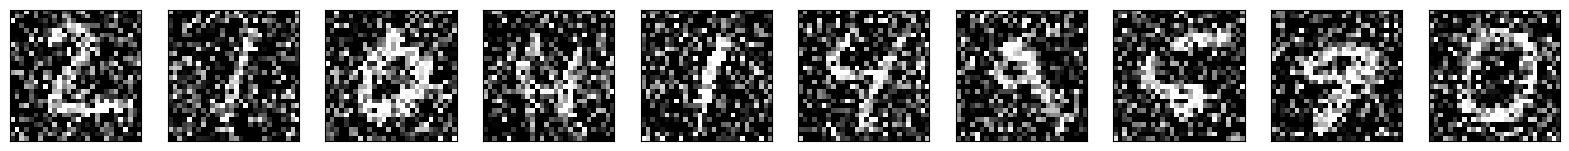

In [ ]:
n = 10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
  ax = plt.subplot(1,n,i)
  plt.imshow(xtest_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
input_img = keras.Input(shape=(28,28,1))
x = layers.Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
x = layers.MaxPool2D((2,2),padding='same')(x)
x = layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoded = layers.MaxPooling2D((2,2),padding = 'same')(x)
x = layers.Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
decoded=layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)


In [ ]:
autoencoder=keras.Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
autoencoder.fit(xtrain_noisy,xtrain,epochs=3,batch_size=128,validation_data=(xtest_noisy,xtest))

Epoch 1/3
469/469 [==============================] - 120s 255ms/step - loss: 0.1398
Epoch 2/3
469/469 [==============================] - 104s 221ms/step - loss: 0.1142
Epoch 3/3
469/469 [==============================] - 100s 214ms/step - loss: 0.1087


In [ ]:
predictions = autoencoder.predict(xtest_noisy)

313/313 [==============================] - 4s 11ms/step


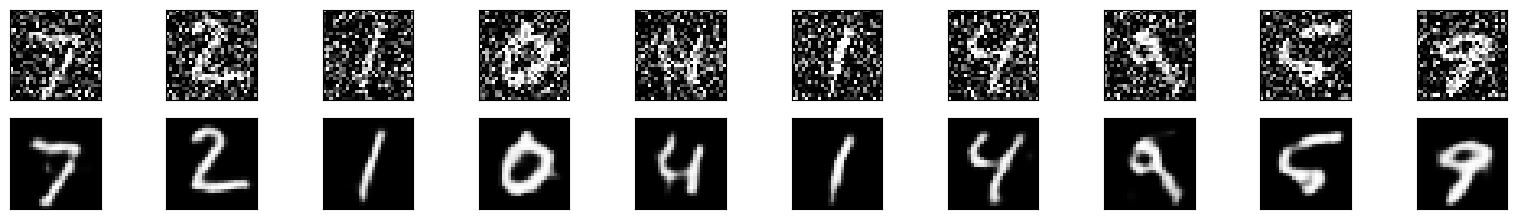

In [ ]:
n=10
plt.figure(figsize=(40,4))
for i in range(10):
    ax=plt.subplot(3,20,i+1)
    plt.imshow(xtest_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(3,20,i+1+20)
    plt.imshow(predictions[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)